In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing

In [2]:
california = fetch_california_housing()

In [3]:
california_df = pd.DataFrame(california.data, columns = california.feature_names)

In [4]:
california_df['Price'] = california.target

print(california_df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [5]:
print(california_df)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  Price  
0        -122

In [6]:
print("Columns in the dataset:", california_df.columns)

Columns in the dataset: Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Price'],
      dtype='object')


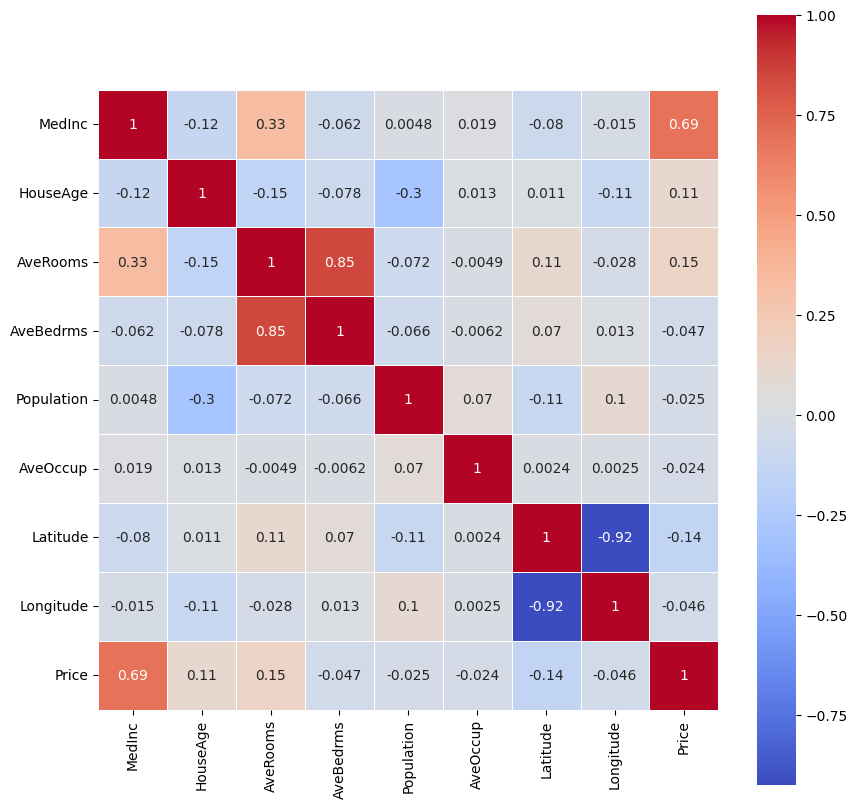

In [7]:
# Create a heatmap to visualize the correlation between the features
plt.figure(figsize=(10, 10))
correlation_matrix = california_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, linewidths=0.5)
plt.show()

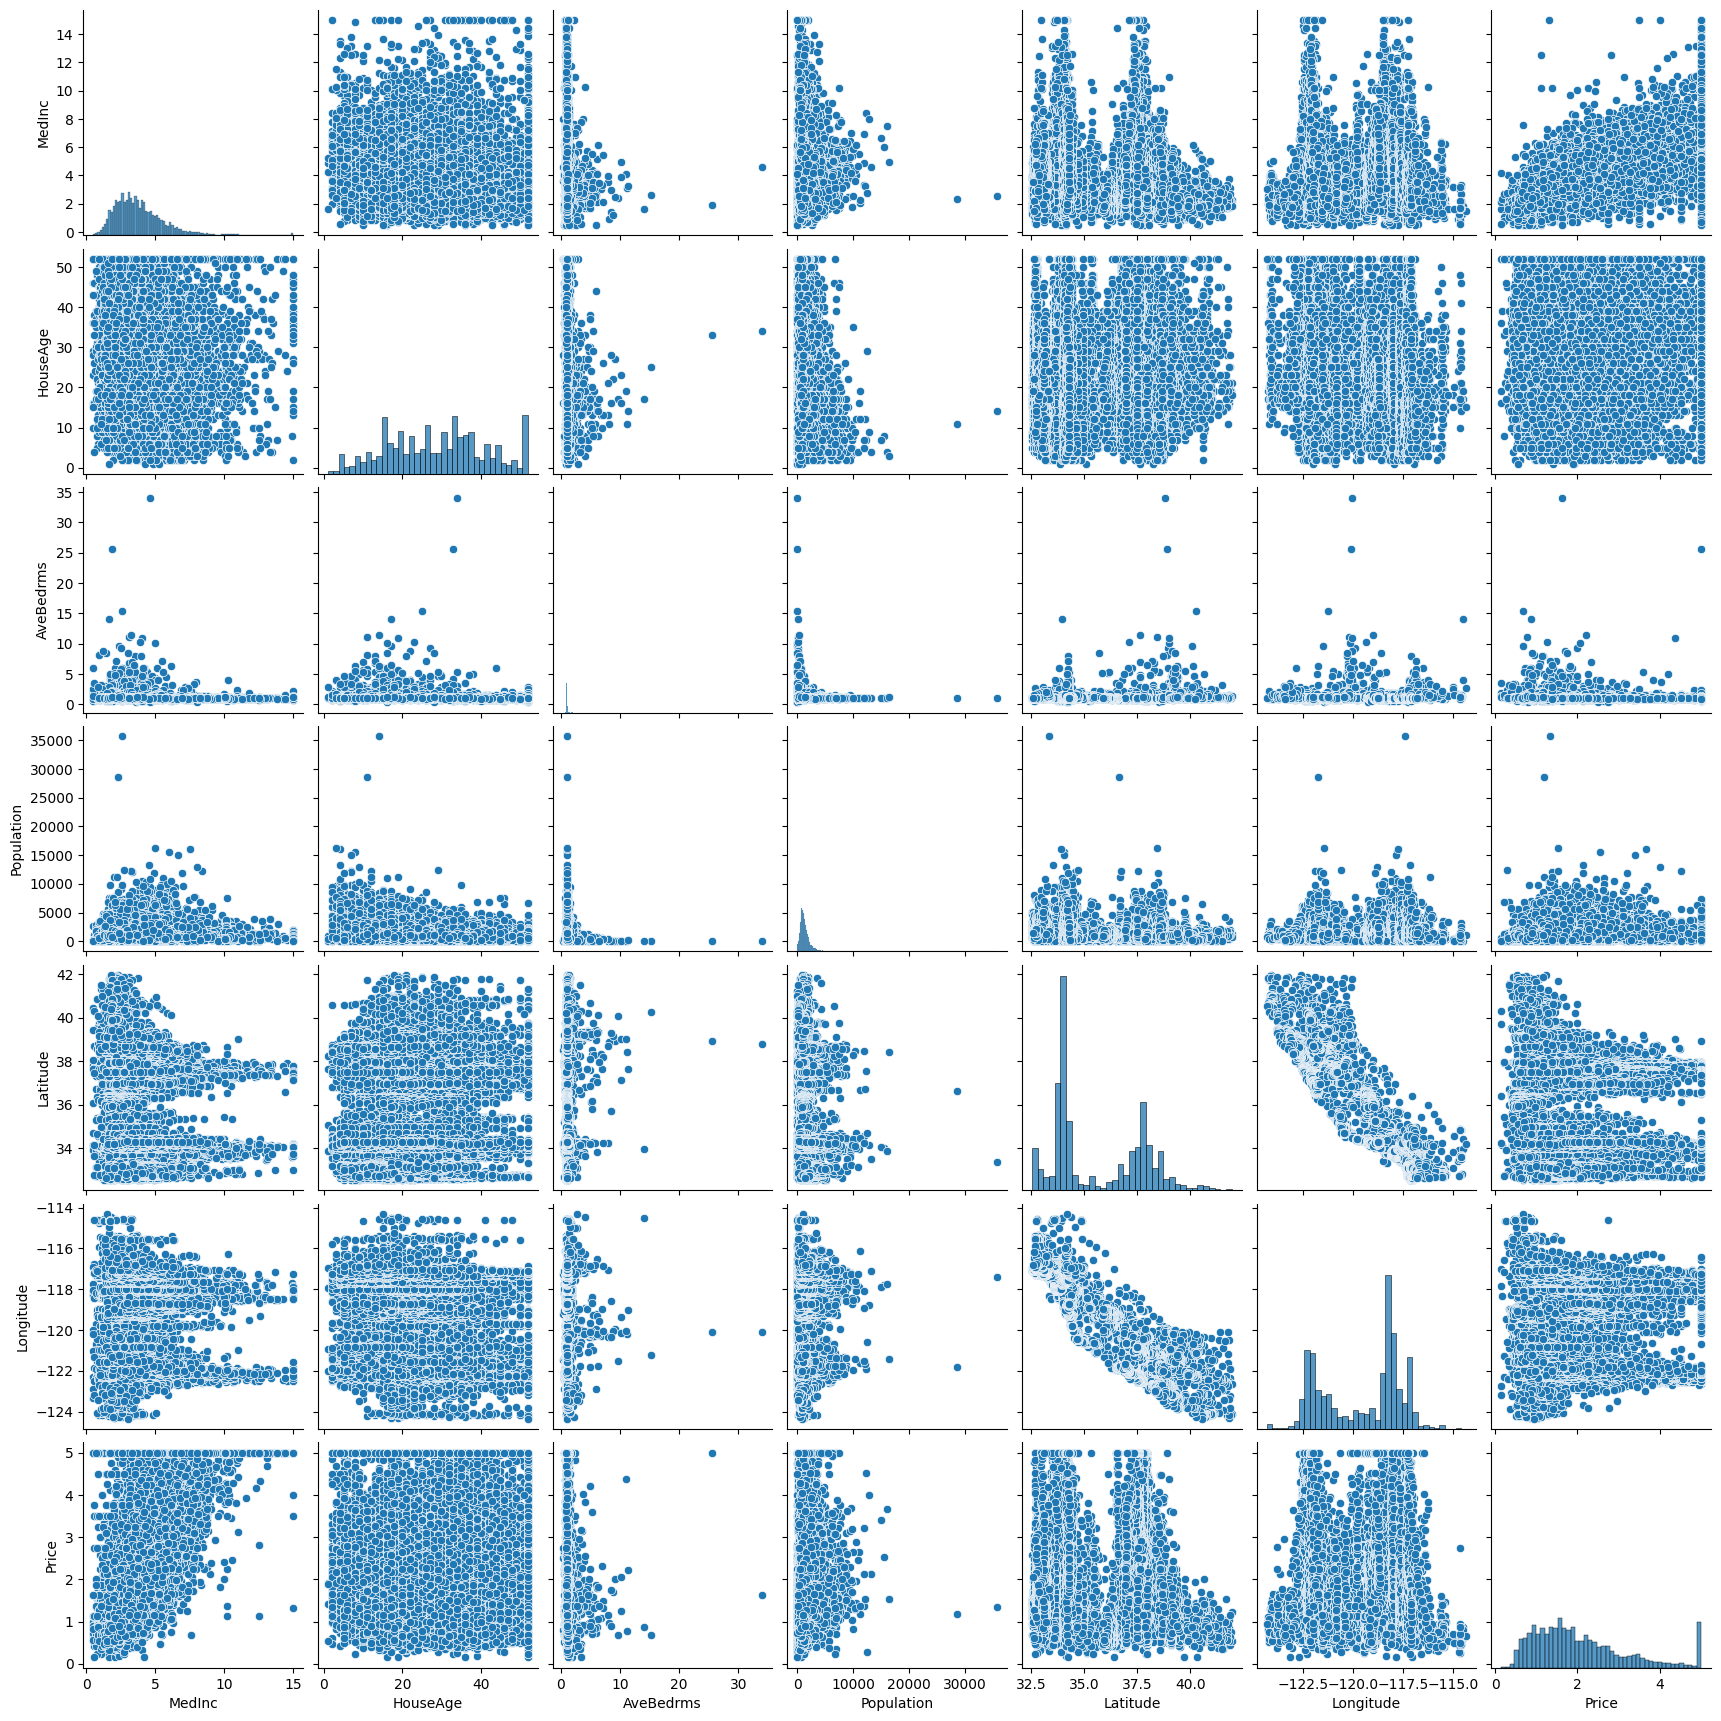

In [8]:

california_df.drop(columns=["AveRooms", "AveOccup"], inplace=True)
sns.pairplot(california_df)

In [9]:
california_df['HouseAge'] = np.log(california_df['HouseAge'])

print(california_df.head())

   MedInc  HouseAge  AveBedrms  Population  Latitude  Longitude  Price
0  8.3252  3.713572   1.023810       322.0     37.88    -122.23  4.526
1  8.3014  3.044522   0.971880      2401.0     37.86    -122.22  3.585
2  7.2574  3.951244   1.073446       496.0     37.85    -122.24  3.521
3  5.6431  3.951244   1.073059       558.0     37.85    -122.25  3.413
4  3.8462  3.951244   1.081081       565.0     37.85    -122.25  3.422


In [10]:
features = california.feature_names
target = 'Price'  

X = california.data
y = california.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

print("The dimension of X_train is {}".format(X_train.shape
                                             ))
print("The dimension of X_test is {}".format(X_test.shape))

The dimension of X_train is (14448, 8)
The dimension of X_test is (6192, 8)


In [11]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [12]:
ridgeReg = Ridge(alpha=10)
ridgeReg.fit(X_train, y_train)   

train_score_ridge = ridgeReg.score(X_train, y_train)
test_score_ridge = ridgeReg.score(X_test, y_test)

print("\nRidge Regression Model:")
print("Train score: {:.4f}".format(train_score_ridge))
print("Test score: {:.4f}".format(test_score_ridge))


Ridge Regression Model:
Train score: 0.6063
Test score: 0.6051


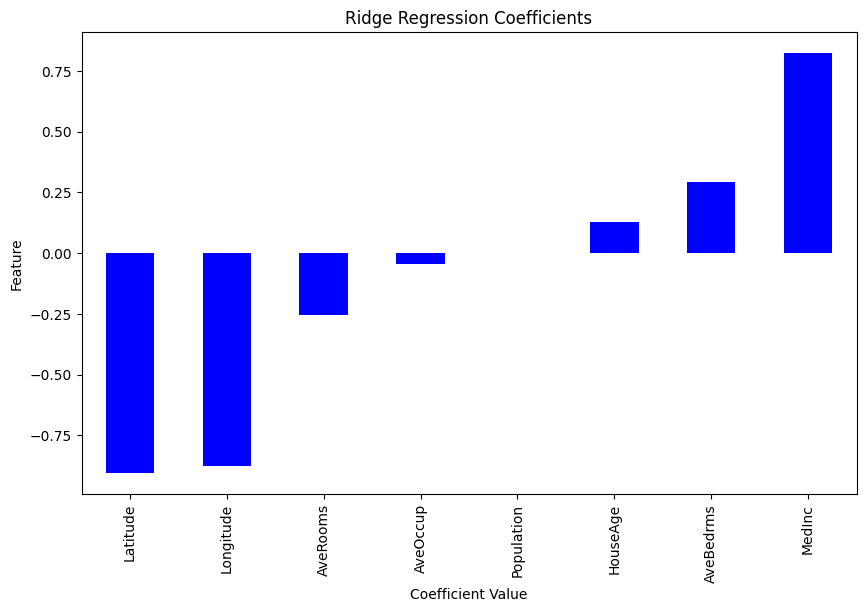

In [13]:
feature_names = california.feature_names
plt.figure(figsize=(10, 6))
coefficients = pd.Series(ridgeReg.coef_, index=feature_names)   
coefficients.sort_values().plot(kind='bar', color='blue')  
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Ridge Regression Coefficients')
plt.show()

In [14]:
lasso = Lasso(alpha=10)
lasso.fit(X_train, y_train)

train_score_ls = lasso.score(X_train, y_train)
test_score_ls = lasso.score(X_test, y_test)

print("Lasso Regression Model:")
print("Train score: {:.4f}".format(train_score_ls))
print("Test score: {:.4f}".format(test_score_ls))

Lasso Regression Model:
Train score: 0.0000
Test score: -0.0002


In [15]:
print(lasso.coef_)


[ 0.  0.  0. -0. -0. -0. -0. -0.]


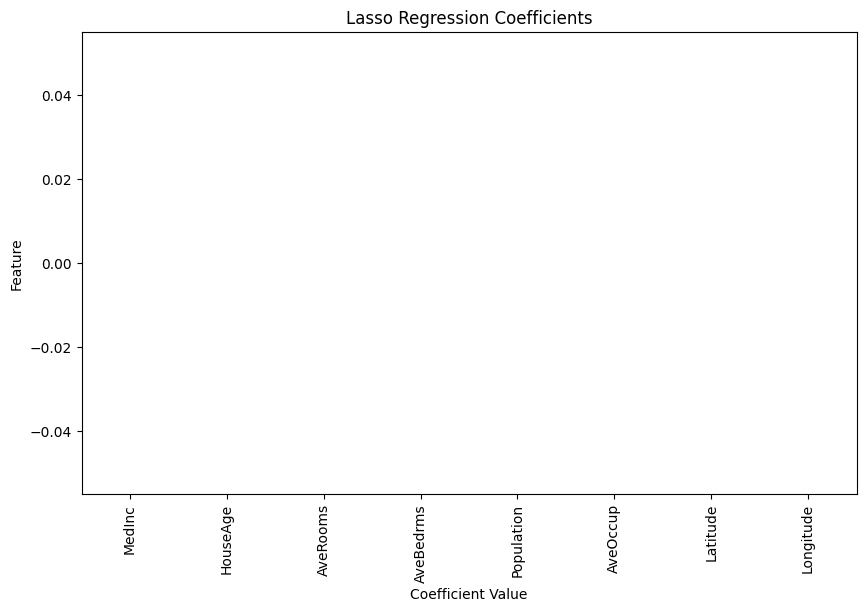

In [16]:
plt.figure(figsize=(10, 6))
coefficients = pd.Series(lasso.coef_, index=feature_names) 
coefficients.sort_values().plot(kind='bar', color='blue')  
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Lasso Regression Coefficients')
plt.show()


In [17]:

from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10], random_state=0).fit(X_train, y_train)

train_score_cv = lasso_cv.score(X_train, y_train)
test_score_cv = lasso_cv.score(X_test, y_test)

print("LassoCV Model:")
print("Train score: {:.4f}".format(train_score_cv))
print("Test score: {:.4f}".format(test_score_cv))

LassoCV Model:
Train score: 0.6020
Test score: 0.6000


In [18]:
# RidgeCV Model with cross-validation
ridge_cv = RidgeCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10]).fit(X_train, y_train)

# Evaluate model scores
train_score_cv = ridge_cv.score(X_train, y_train)
test_score_cv = ridge_cv.score(X_test, y_test)

print("RidgeCV Model:")
print("Train score: {:.4f}".format(train_score_cv))
print("Test score: {:.4f}".format(test_score_cv))

RidgeCV Model:
Train score: 0.6063
Test score: 0.6051


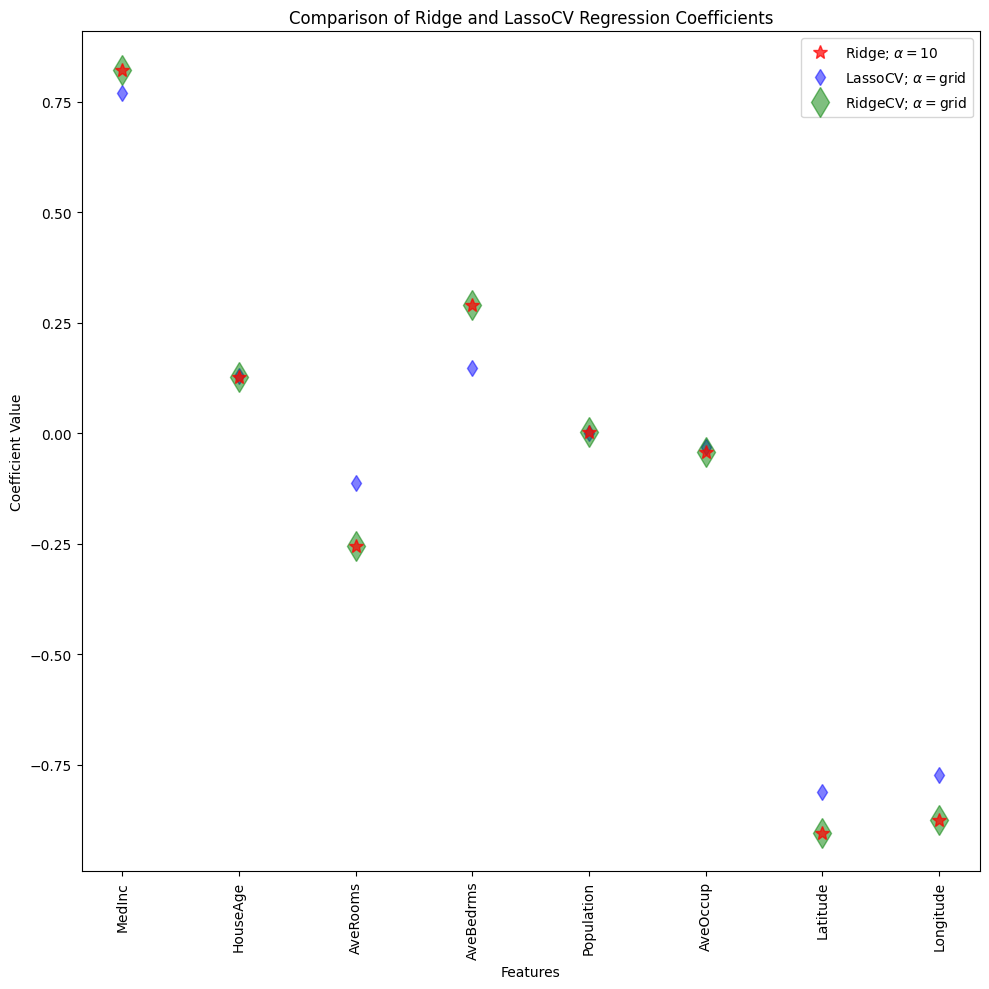

In [19]:

plt.figure(figsize=(10, 10))


plt.plot(feature_names, ridgeReg.coef_, alpha=0.7, linestyle='none', marker='*', markersize=10, color='red', label=r'Ridge; $\alpha = 10$', zorder=7)



plt.plot(feature_names, lasso_cv.coef_, alpha=0.5, linestyle='none', marker='d', markersize=8, color='blue', label=r'LassoCV; $\alpha = $grid')

plt.plot(feature_names, ridge_cv.coef_, alpha=0.5, linestyle='none', marker='d', markersize=15, color='green', label=r'RidgeCV; $\alpha = $grid')


plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Comparison of Ridge and LassoCV Regression Coefficients')
plt.legend()
plt.tight_layout()
plt.show()